In [2]:
%pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [3]:
import io
import ipywidgets as widgets
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
import urllib
from skimage.transform import resize
from matplotlib.image import imread
import os
from IPython.display import display
from skimage import io as io_url
import cv2
from PIL import Image

In [4]:
def grayscale_image(image):
    B = image[:, :, 0]
    G = image[:, :, 1]
    R = image[:, :, 2]
    grey_image = 0.299 * R + 0.587 * G + 0.114 * B

    grey_image = grey_image.astype(np.uint8)

    return grey_image

In [56]:
# Create image widgets
image3_spatial = widgets.Image(format='png', width=500, height=500, description='Spatial')
image3_freq    = widgets.Image(format='png', width=500, height=500, description='Frequency')
sidebyside     = widgets.HBox([image3_spatial, image3_freq])

# Create slider/select widgets
slider_inner   = widgets.FloatSlider(value=0,      min=0, max=1,      step=0.01, description='Inner radius')
slider_outer   = widgets.FloatSlider(value=1.44/2, min=0, max=1.44/2, step=0.01, description='Outer radius')

buf            = io.BytesIO()

orig_img = io_url.imread('https://img2.zergnet.com/2309662_300.jpg')
orig_img = grayscale_image(orig_img)

x = np.fft.fftfreq(orig_img.shape[0])
y = np.fft.fftfreq(orig_img.shape[1])

xv, yv = np.meshgrid(x, y)
xv = np.fft.fftshift(xv)
yv = np.fft.fftshift(yv)

def filter_frequency(orig_img, mask):
    """
    You need to remove frequency based on the given mask.
    Params:
        orig_img: numpy image
        mask: same shape with orig_img indicating which frequency hold or remove
    Output:
        f_img: frequency image after applying mask
        img: image after applying mask
    """
    f_img = np.fft.fft2(orig_img)
    f_img = np.fft.fftshift(f_img)
    f_img_masked = f_img * mask
    f_img = np.fft.ifftshift(f_img_masked)
    img = np.fft.ifft2(f_img)
    return f_img_masked, img


def on_value_change3(change):
    mask = (np.sqrt(xv**2 + yv**2) < slider_outer.value) & \
           (np.sqrt(xv**2 + yv**2) >= slider_inner.value)
    mask = np.float32(mask)

    fimg, img = filter_frequency(orig_img, mask)
    buf.seek(0)
    tmp = PIL.Image.fromarray(255*np.abs(img/(img.max())+0.0001))
    tmp = tmp.convert('L')
    tmp.save(buf, 'png')
    image3_spatial.value = buf.getvalue()

    buf.seek(0)
    tmp = PIL.Image.fromarray(255 * np.log(0.0001 * np.abs(fimg) + 1))
    tmp = tmp.convert('L')
    tmp.save(buf, 'png')
    image3_freq.value = buf.getvalue()


slider_inner.observe(on_value_change3, names='value')
slider_outer.observe(on_value_change3, names='value')

on_value_change3(0)

display(sidebyside)
display(slider_inner)
display(slider_outer)

FloatSlider(value=0.0, description='Inner radius', max=1.0, step=0.01)

FloatSlider(value=0.72, description='Outer radius', max=0.72, step=0.01)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8200\1830548709.py:47: RuntimeWarning: invalid value encountered in divide
  tmp = PIL.Image.fromarray(255*np.abs(img/(img.max())+0.0001))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8200\1830548709.py:47: RuntimeWarning: invalid value encountered in divide
  tmp = PIL.Image.fromarray(255*np.abs(img/(img.max())+0.0001))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8200\1830548709.py:47: RuntimeWarning: invalid value encountered in divide
  tmp = PIL.Image.fromarray(255*np.abs(img/(img.max())+0.0001))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8200\1830548709.py:47: RuntimeWarning: invalid value encountered in divide
  tmp = PIL.Image.fromarray(255*np.abs(img/(img.max())+0.0001))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8200\1830548709.py:47: RuntimeWarning: invalid value encountered in divide
  tmp = PIL.Image.fromarray(255*np.abs(img/(img.max())+0.0001))
C:\Users\Admin\AppData\Local\Temp\ipykernel_8200\1830548709.py:47: RuntimeWarning: in

In [90]:
def read_img(img_path, img_size=(512, 512)):
  """
    + Đọc ảnh
    + Chuyển thành grayscale
    + Thay đổi kích thước ảnh thành img_size
  """
  img = cv2.imread(img_path, 0)
  img = cv2.resize(img, img_size)
  return img


def create_hybrid_img(img1, img2, r):
  """
  Create hydrid image
  Params:
    img1: numpy image 1
    img2: numpy image 2
    r: radius that defines the filled circle of frequency of image 1. Refer to the homework title to know more.
  """
  # You need to implement the function
  x1 = np.fft.fftfreq(img1.shape[0])
  y1 = np.fft.fftfreq(img1.shape[1])

  xv1, yv1 = np.meshgrid(x1, y1)
  xv1 = np.fft.fftshift(xv1)
  yv1 = np.fft.fftshift(yv1)

  mask1 = (np.sqrt(xv1**2 + yv1**2) < r)
  mask1 = np.float32(mask1)
  mask2 = np.float32(1 - mask1)

  f_img1, img1_after = filter_frequency(img1, mask1)
  f_img2, img2_after = filter_frequency(img2, mask2)

  f_img = f_img1 + f_img2
  f_img = np.fft.ifftshift(f_img)
  hybrid = np.fft.ifft2(f_img)
  
  return np.abs(hybrid)

(-0.5, 511.5, 511.5, -0.5)

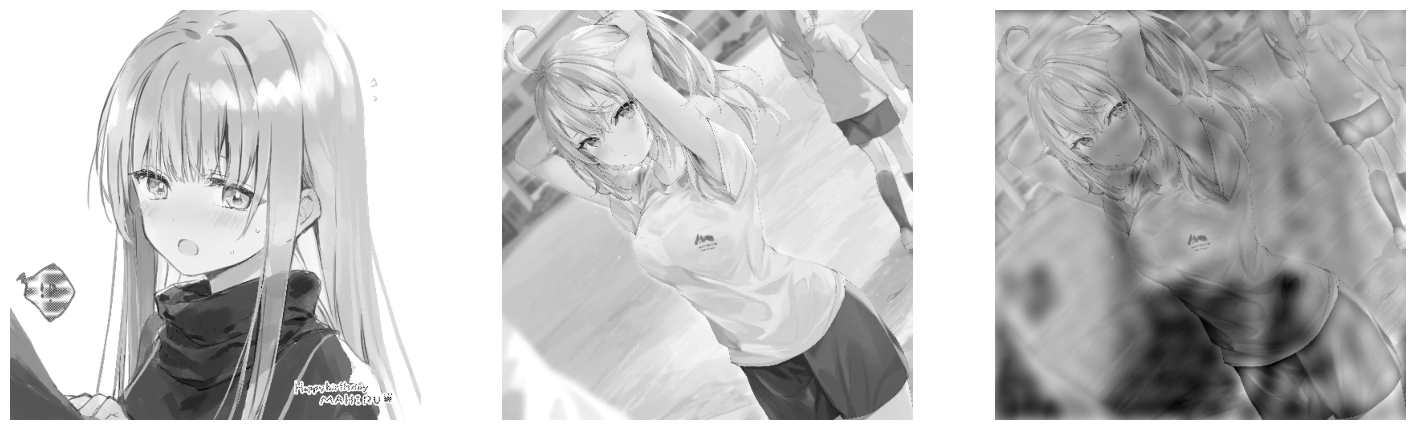

In [93]:
image_1_path = "ex234_images/mahiru.jpg" # <-- need to change
image_2_path = "ex234_images/arya.png" # <-- need to change
img_1 = read_img(image_1_path)
img_2 = read_img(image_2_path)
hybrid_img = create_hybrid_img(img_1, img_2, 0.03)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 15))
axes[0].imshow(img_1, cmap="gray")
axes[0].axis("off")
axes[1].imshow(img_2, cmap="gray")
axes[1].axis("off")
axes[2].imshow(hybrid_img, cmap="gray")
axes[2].axis("off")